In [1]:
# Replace the URL with the actual repository URL you want to clone
!git clone https://github.com/Hrant3/Data_visualization.git

Cloning into 'Data_visualization'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 1.78 MiB | 3.99 MiB/s, done.


In [3]:
%cd Data_visualization

/Users/hrantbaloyan/Data_visualization


In [5]:
!git pull

Already up to date.


In [61]:
import pandas as pd

# Convert the GitHub link to a raw URL
url = "https://raw.githubusercontent.com/Metricam/Public_data/master/MARKET_Car_Prices.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

In [79]:
df['num_of_cylinders'].value_counts()

num_of_cylinders
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [69]:
cylinder_map = {'two': 2, 'four': 4,'six':6,'eight':8,'three':3,'twelve':12,'five':5}
df['num_of_cylinders'] = df['num_of_cylinders'].map(cylinder_map)

In [75]:
df['num_of_cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num_of_cylinders, Length: 205, dtype: int64

In [73]:
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            most_frequent = df[col].mode().iloc[0] if not df[col].mode().empty else None
            df[col].fillna(most_frequent, inplace=True)
        else:
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
    return df

df = impute_missing_values(df)

/var/folders/b5/nw_k6fgd0bbf1m9b3glg093m0000gp/T/ipykernel_99350/3482539181.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/b5/nw_k6fgd0bbf1m9b3glg093m0000gp/T/ipykernel_99350/3482539181.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [109]:
df.loc[0]

make                 alfa-romero
fuel_type                    gas
aspiration                   std
num_of_doors                 two
body_style           convertible
drive_wheels                 rwd
engine_location            front
wheel_base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb_weight                 2548
engine_type                 dohc
num_of_cylinders               4
engine_size                  130
fuel_system                 mpfi
bore                        3.47
stroke                      2.68
compression_ratio            9.0
horsepower                 111.0
peak_rpm                  5000.0
city_mpg                      21
highway_mpg                   27
price                    13495.0
Name: 0, dtype: object

In [21]:
df

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0



--- Story Point 1: Overall Price Distribution ---
Insight: The distribution of car prices is heavily right-skewed. Most cars are clustered at the lower end of the price range (typically below $15,000), with fewer models reaching significantly higher prices. This suggests a market dominated by budget-friendly options, with luxury or high-performance vehicles being less common in this dataset.


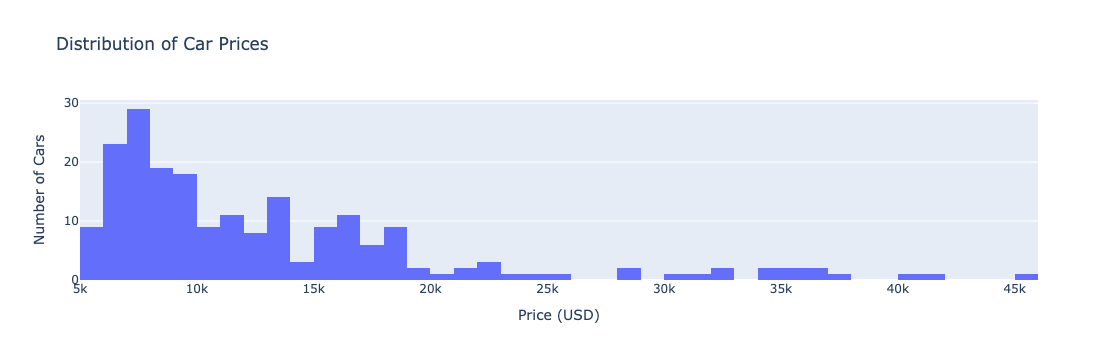

In [77]:
import pandas as pd
import plotly.express as px
import numpy as np



fig1 = px.histogram(df, x='price', nbins=50, title='Distribution of Car Prices')
fig1.update_layout(xaxis_title='Price (USD)', yaxis_title='Number of Cars')

print("\n--- Story Point 1: Overall Price Distribution ---")
print("Insight: The distribution of car prices is heavily right-skewed. Most cars are clustered at the lower end of the price range (typically below $20_000), with fewer models reaching significantly higher prices. This suggests a market dominated by budget-friendly options, with luxury or high-performance vehicles being less common in this dataset.")
fig1.show()


In [129]:
median_prices_make.index

Index(['chevrolet', 'honda', 'dodge', 'plymouth', 'subaru', 'nissan',
       'mitsubishi', 'toyota', 'renault', 'volkswagen', 'mazda', 'isuzu',
       'saab', 'alfa-romero', 'mercury', 'peugot', 'audi', 'volvo', 'bmw',
       'porsche', 'mercedes-benz', 'jaguar'],
      dtype='object', name='make')


--- Story Point 2: How Does Brand Influence Price? ---
Insight: There's a clear effect in pricing based on the car manufacturer ('make'). Brands like Chevrolet, Dodge, and Plymouth tend to occupy the lower price range, while Jaguar, Mercedes-Benz, and Porsche have significantly higher median prices and maintain a wider price range, indicating more premium offerings. This highlights the strong brand effect on car valuation.


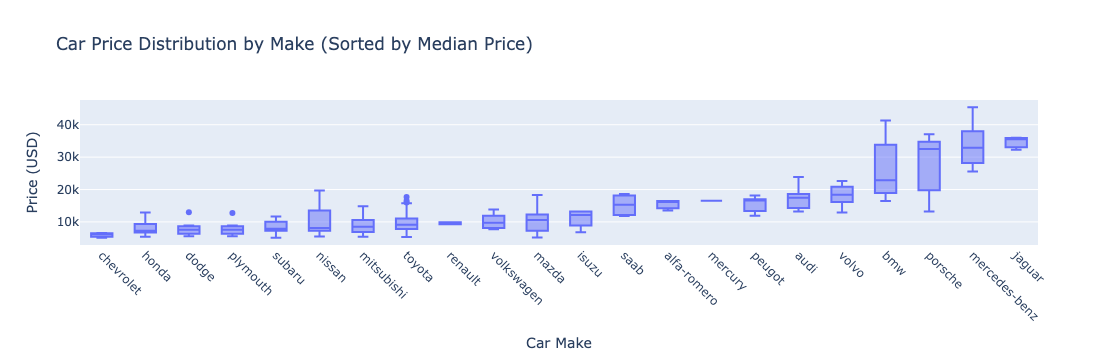

In [135]:
median_prices_make = df.groupby('make')['price'].median().sort_values()

fig2 = px.box(df, x='make', y='price', title='Car Price Distribution by Make (Sorted by Median Price)',
              category_orders={'make': median_prices_make.index}) # Sort boxes by median price
fig2.update_layout(xaxis_title='Car Make', yaxis_title='Price (USD)')
fig2.update_xaxes(tickangle=45)

print("\n--- Story Point 2: How Does Brand Influence Price? ---")
print("Insight: There's a clear effect in pricing based on the car manufacturer ('make'). Brands like Chevrolet, Dodge, and Plymouth tend to occupy the lower price range, while Jaguar, Mercedes-Benz, and Porsche have significantly higher median prices and maintain a wider price range, indicating more premium offerings. This highlights the strong brand effect on car valuation.")

fig2.show()


--- Refined Story Point 3: The Power-Price Connection (Faceted by Drive Wheels) ---
Insight: Separating by drive wheels confirms the positive horsepower-price relationship for all types (FWD, RWD, 4WD). However, it clearly shows that RWD vehicles generally start at a higher price point and occupy the higher end of the horsepower/price spectrum compared to FWD. The trendline for RWD appears steeper, suggesting price increases more rapidly with horsepower for these vehicles. 4WD vehicles are fewer in number but show a similar positive trend.


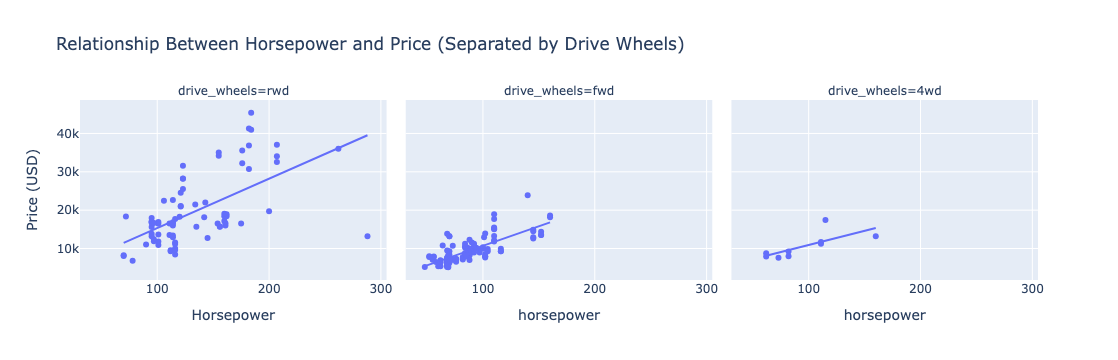

In [141]:
fig3 = px.scatter(df, x='horsepower', y='price',
                          facet_col='drive_wheels',
                          title='Relationship Between Horsepower and Price (Separated by Drive Wheels)',
                          hover_data=['make', 'body_style'],
                          trendline='ols'
                         )
fig3.update_layout(xaxis_title='Horsepower', yaxis_title='Price (USD)')


print("\n--- Refined Story Point 3: The Power-Price Connection (Faceted by Drive Wheels) ---")
print("Insight: Separating by drive wheels confirms the positive horsepower-price relationship for all types (FWD, RWD, 4WD). However, it clearly shows that RWD vehicles generally start at a higher price point and occupy the higher end of the horsepower/price spectrum compared to FWD. The trendline for RWD appears steeper, suggesting price increases more rapidly with horsepower for these vehicles. 4WD vehicles are fewer in number but show a similar positive trend.")
fig3.show()


--- Story Point 4: Engine Size vs. Price (Faceted by Fuel Type) ---
Insight: Both gas and diesel cars show a positive correlation between engine size and price. The relationship appears quite strong for both. While there are fewer diesel cars in the dataset, they tend to have relatively larger engines compared to the bulk of gasoline cars and cover a significant price range. The trendlines suggest a similar positive slope, meaning price increases with engine size for both fuel types.


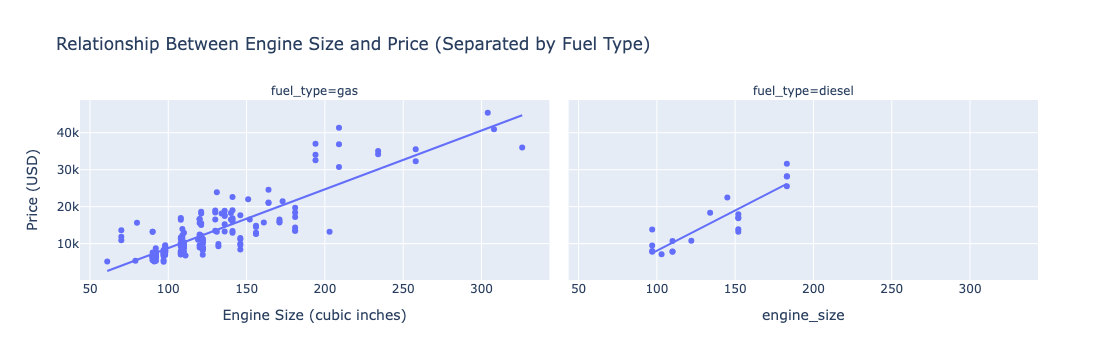

In [139]:
fig4 = px.scatter(df, x='engine_size', y='price',
                          facet_col='fuel_type', # Separate plots for gas and diesel
                          title='Relationship Between Engine Size and Price (Separated by Fuel Type)',
                          hover_data=['make', 'num_of_cylinders'],
                          trendline='ols'
                         )
fig4.update_layout(xaxis_title='Engine Size (cubic inches)', yaxis_title='Price (USD)')

print("\n--- Story Point 4: Engine Size vs. Price (Faceted by Fuel Type) ---")
print("Insight: Both gas and diesel cars show a positive correlation between engine size and price. The relationship appears quite strong for both. While there are fewer diesel cars in the dataset, they tend to have relatively larger engines compared to the bulk of gasoline cars and cover a significant price range. The trendlines suggest a similar positive slope, meaning price increases with engine size for both fuel types.")
fig4.show()


--- Story Point 5: Body Style and Price Variations ---
Insight: Body style influences price, though perhaps less dramatically than brand or engine specs for some categories. Hatchbacks and sedans cover a wide range but have lower median prices compared to convertibles and hardtops, which occupy the higher end of the market. Wagons sit somewhere in the middle. This shows that practicality (hatchback, sedan) is often available at lower price points, while styles associated with luxury or sportiness (convertible, hardtop) command a premium.


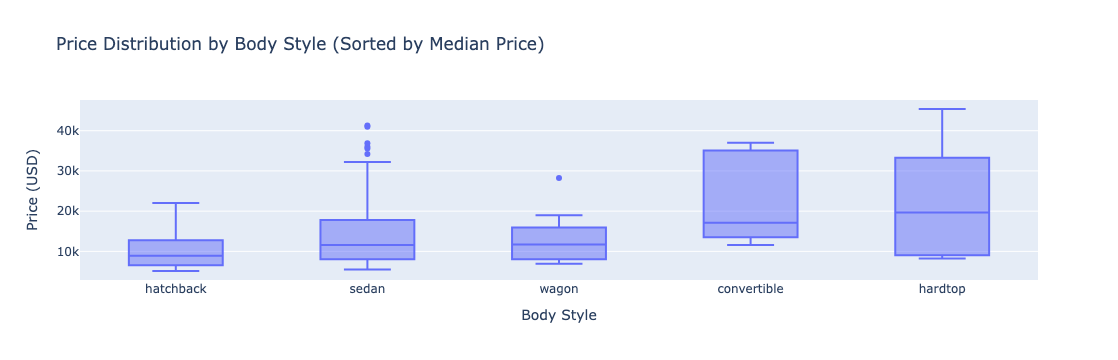

In [31]:
median_prices_body = df.groupby('body_style')['price'].median().sort_values()

fig5 = px.box(df, x='body_style', y='price',
              title='Price Distribution by Body Style (Sorted by Median Price)',
              category_orders={'body_style': median_prices_body.index}) # Sort boxes
fig5.update_layout(xaxis_title='Body Style', yaxis_title='Price (USD)')

print("\n--- Story Point 5: Body Style and Price Variations ---")
print("Insight: Body style influences price, though perhaps less dramatically than brand or engine specs for some categories. Hatchbacks and sedans cover a wide range but have lower median prices compared to convertibles and hardtops, which occupy the higher end of the market. Wagons sit somewhere in the middle. This shows that practicality (hatchback, sedan) is often available at lower price points, while styles associated with luxury or sportiness (convertible, hardtop) command a premium.")
fig5.show()


--- Story Point 6: The Efficiency Trade-off? (Faceted by Aspiration) ---
Insight: Faceting by aspiration (standard vs. turbo) confirms the general negative trend between highway MPG and price for both groups. Cars with better fuel economy tend to be cheaper. Standard aspiration cars cover a wider MPG range, especially towards the higher efficiency end. Turbocharged cars are clustered more in the mid-to-lower MPG range but reach high price points, reinforcing the idea that turbocharging in this context is often used for performance (which correlates with higher price and lower MPG) rather than purely for efficiency.


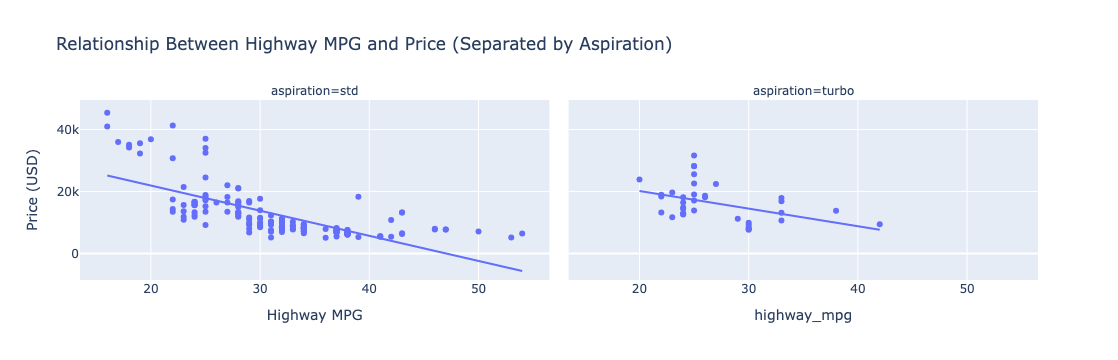

In [145]:
fig6= px.scatter(df, x='highway_mpg', y='price',
                          facet_col='aspiration', # Separate plots for std and turbo
                          title='Relationship Between Highway MPG and Price (Separated by Aspiration)',
                          hover_data=['make', 'horsepower'],
                          trendline='ols'
                         )
fig6.update_layout(xaxis_title='Highway MPG', yaxis_title='Price (USD)')

print("\n--- Story Point 6: The Efficiency Trade-off? (Faceted by Aspiration) ---")
print("Insight: Faceting by aspiration (standard vs. turbo) confirms the general negative trend between highway MPG and price for both groups. Cars with better fuel economy tend to be cheaper. Standard aspiration cars cover a wider MPG range, especially towards the higher efficiency end. Turbocharged cars are clustered more in the mid-to-lower MPG range but reach high price points, reinforcing the idea that turbocharging in this context is often used for performance (which correlates with higher price and lower MPG) rather than purely for efficiency.")
fig6.show()


---  Story Point 7: Weight as a Price Driver (Faceted by Body Style) ---
Insight: Separating the Curb Weight vs. Price relationship by body style provides a clearer view:
- **All Styles:** Show a positive correlation - heavier cars cost more within each style.
- **Hatchback/Wagon:** Contain mostly vehicles with lower and mid-range weights and prices.
- **Sedan:** Occupies a broad middle ground in both weight and price.
- **Convertible/Hardtop:** Clearly dominate the higher price points, often at higher weights. Need to take account that amount of cars here are not a lot.
This faceted view makes it easier to assess the specific weight range and price sensitivity to weight for each distinct body style.


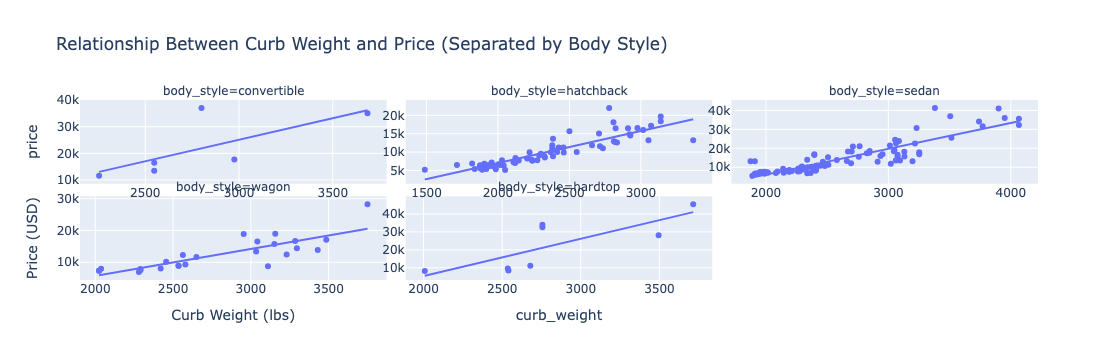

In [159]:
fig7= px.scatter(df, x='curb_weight', y='price',
                          facet_col='body_style', # Create separate plots for each body style
                          facet_col_wrap=3, # Arrange facets in rows (optional, adjust as needed)
                          title='Relationship Between Curb Weight and Price (Separated by Body Style)',
                          hover_data=['make'], # Removed 'body_style' as it's now in the facet title
                          trendline='ols' # Add trendline to each facet
                         )
fig7.update_layout(xaxis_title='Curb Weight (lbs)', yaxis_title='Price (USD)')
# Ensure y-axes are consistent across facets for direct comparison
fig7.update_yaxes(matches=None, showticklabels=True) # Give each facet its own y-axis if ranges differ significantly
fig7.update_xaxes(matches=None, showticklabels=True) # Give each facet its own x-axis if ranges differ significantly


print("\n---  Story Point 7: Weight as a Price Driver (Faceted by Body Style) ---")
print("Insight: Separating the Curb Weight vs. Price relationship by body style provides a clearer view:\n"
      "- **All Styles:** Show a positive correlation - heavier cars cost more within each style.\n"
      "- **Hatchback/Wagon:** Contain mostly vehicles with lower and mid-range weights and prices.\n"
      "- **Sedan:** Occupies a broad middle ground in both weight and price.\n"
      "- **Convertible/Hardtop:** Clearly dominate the higher price points, often at higher weights. Need to take account that amount of cars here are not a lot.\n"
      "This faceted view makes it easier to assess the specific weight range and price sensitivity to weight for each distinct body style.")
fig7.show()

In [165]:
df['num_of_cylinders'].value_counts()

num_of_cylinders
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64


--- Story Point 8: The Cost of Cylinders ---
Insight: There is a clear trend of increasing price with the number of cylinders. Four-cylinder engines are the most common and cover a wide price range but have a relatively low median price. Six-cylinder engines are significantly more expensive on average, followed by eight and twelve cylinders. The 'two' cylinder category  also shows relatively high prices, indicating their unique performance nature. More cylinders generally mean more complexity and often more power, driving up the cost.


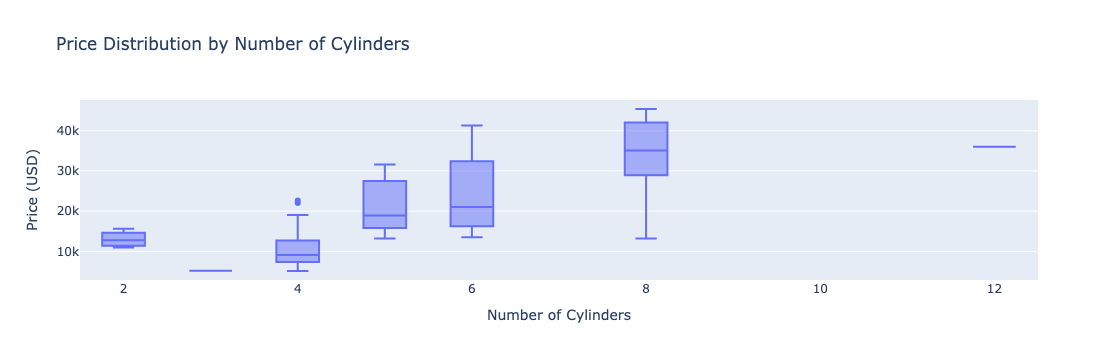

In [167]:
cylinder_order = [2, 3, 4, 5, 6, 8,12]
# Convert num_of_cylinders to a categorical type with the specified order
df['num_of_cylinders'] = pd.Categorical(df['num_of_cylinders'], categories=cylinder_order, ordered=True)


fig8 = px.box(df, x='num_of_cylinders', y='price',
              title='Price Distribution by Number of Cylinders',
              category_orders={'num_of_cylinders': cylinder_order}) # Ensure correct order
fig8.update_layout(xaxis_title='Number of Cylinders', yaxis_title='Price (USD)')

print("\n--- Story Point 8: The Cost of Cylinders ---")
print("Insight: There is a clear trend of increasing price with the number of cylinders. Four-cylinder engines are the most common and cover a wide price range but have a relatively low median price. Six-cylinder engines are significantly more expensive on average, followed by eight and twelve cylinders. The 'two' cylinder category  also shows relatively high prices, indicating their unique performance nature. More cylinders generally mean more complexity and often more power, driving up the cost.")
fig8.show()


---- Story Point 10: Interaction of Drive Wheels and Body Style on Price ---
Insight: This violin plot shows how price distributions vary based on combinations of drive wheels and body style. Key observations include:
- FWD vehicles are dominated by lower-priced sedans , hatchbacks,wagons.
- RWD vehicles show much greater price variation, with expensive convertibles, hardtops, and sedans. RWD hatchbacks also exist but span a wide price range.
- 4WD vehicles are less common but include relatively affordable hatchbacks/wagons/sedans.
This highlights that certain combinations (like RWD Convertibles/Hard-tops) are strongly associated with the premium market segment, while others (like FWD Sedans/Hatchbacks) form the core of the budget/mid-range market.


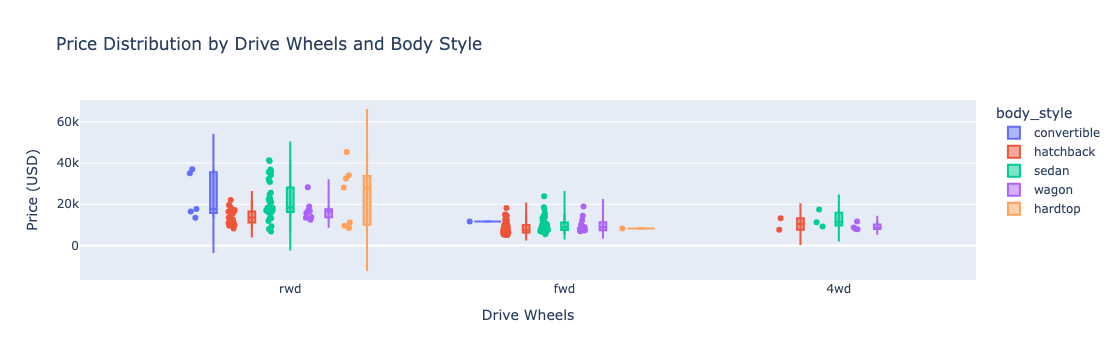

In [175]:
fig10 = px.violin(df, x='drive_wheels', y='price', color='body_style',
                  box=True, 
                  points='all', #
                  title='Price Distribution by Drive Wheels and Body Style',
                  hover_data=['make'])
fig10.update_layout(xaxis_title='Drive Wheels', yaxis_title='Price (USD)')

print("\n---- Story Point 10: Interaction of Drive Wheels and Body Style on Price ---")
print("Insight: This violin plot shows how price distributions vary based on combinations of drive wheels and body style. Key observations include:\n"
      "- FWD vehicles are dominated by lower-priced sedans , hatchbacks,wagons.\n"
      "- RWD vehicles show much greater price variation, with expensive convertibles, hardtops, and sedans. RWD hatchbacks also exist but span a wide price range.\n"
      "- 4WD vehicles are less common but include relatively affordable hatchbacks/wagons/sedans.\n"
      "This highlights that certain combinations (like RWD Convertibles/Hard-tops) are strongly associated with the premium market segment, while others (like FWD Sedans/Hatchbacks) form the core of the budget/mid-range market.")
fig10.show()




--- Story Point 14: Engine Performance Profile - Peak RPM vs. Price ---
Insight: This plot explores where engines make their peak power (Peak RPM) versus the car's price. There isn't a simple linear relationship. However, coloring by horsepower reveals patterns:
- Higher horsepower cars (brighter colors) tend to be more expensive, regardless of peak RPM.
- Many high-priced, high-horsepower cars achieve peak power at moderate RPMs (around 5000-5500 RPM).
- Some high-rpm (Peak RPM > 6000) exist across various price points.
- Lower RPM peak power doesn't necessarily mean cheap; some larger engines or diesels can be in expensive vehicles.
Overall, peak RPM alone isn't a primary price driver, but it reflects engine design philosophy which interacts with horsepower and price.


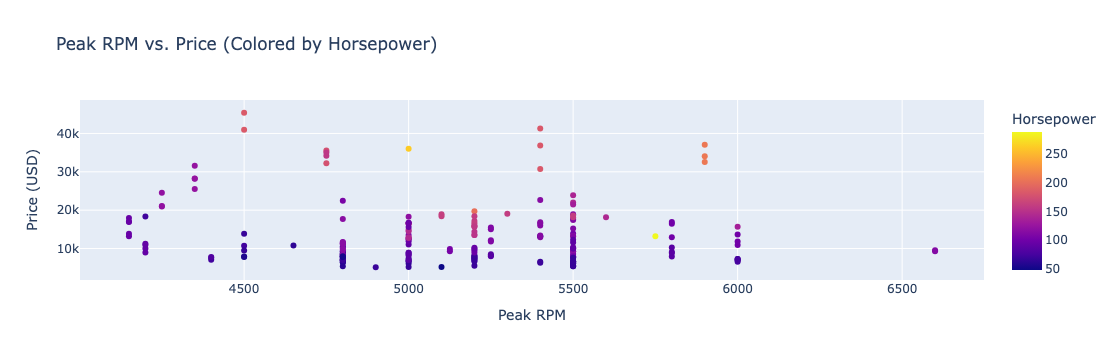

In [179]:
fig14 = px.scatter(df, x='peak_rpm', y='price',
                   title='Peak RPM vs. Price (Colored by Horsepower)',
                   hover_data=['make', 'horsepower'],
                   color='horsepower', # Color points by horsepower
                   color_continuous_scale=px.colors.sequential.Plasma # Use a different color scale
                  )
fig14.update_layout(xaxis_title='Peak RPM', yaxis_title='Price (USD)')
fig14.update_coloraxes(colorbar_title='Horsepower')

print("\n--- Story Point 14: Engine Performance Profile - Peak RPM vs. Price ---")
print("Insight: This plot explores where engines make their peak power (Peak RPM) versus the car's price. There isn't a simple linear relationship. However, coloring by horsepower reveals patterns:\n"
      "- Higher horsepower cars (brighter colors) tend to be more expensive, regardless of peak RPM.\n"
      "- Many high-priced, high-horsepower cars achieve peak power at moderate RPMs (around 5000-5500 RPM).\n"
      "- Some high-rpm (Peak RPM > 6000) exist across various price points.\n"
      "- Lower RPM peak power doesn't necessarily mean cheap; some larger engines or diesels can be in expensive vehicles.\n"
      "Overall, peak RPM alone isn't a primary price driver, but it reflects engine design philosophy which interacts with horsepower and price.")
fig14.show()